## Import libraries

In [46]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Load and inspect dataset

In [47]:
df = pd.read_csv(f"{os.getcwd()}\\titanic_train.csv")
print(df)
print(df.info())

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

## Clean data

In [48]:
df['Survived'].value_counts()  # 0 = died, 1 = lived  since 60% of passengers died

Survived
0    549
1    342
Name: count, dtype: int64

### Drop irrelevant features

In [49]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Check for null values

In [50]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

### Replace null values in "Age" with mean value of "Age"

In [51]:
df.fillna(value = { "Age" : df['Age'].mean()}, inplace = True)

In [52]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

### Drop all null values rows in "Embarked"

In [53]:
df.dropna(inplace=True)

In [54]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [55]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Preprocess

### One-hot encoding by dummy variables

In [56]:
Sex = pd.get_dummies(df['Sex'],drop_first = True) # dropping first column to avoid multicollinearity
Embark = pd.get_dummies(df['Embarked'],drop_first = True)

### Add dummy variables to original dataset

In [57]:
df = pd.concat([df, Sex, Embark], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,True,False,True


### Remove "Sex" and "Embarked" because their dummy variables are created

In [58]:
df.drop(['Sex', 'Embarked'], axis=1, inplace = True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


## Extract features and labels

In [59]:
X = df.drop(['Survived'], axis = 1).values

In [60]:
y = df['Survived'].values

In [61]:
np.unique(y)

array([0, 1])

## Train test split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Standardize data

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## KNN - K Nearest Neighbors

In [64]:
knn = KNeighborsClassifier()

### Training the model and Predicting the test data

In [65]:
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [66]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 79.21


### Optimal value of K

In [67]:
Error_Rate = []

for i in range(1,30):

    knn_opt = KNeighborsClassifier(n_neighbors = i)
    knn_opt.fit(X_train_scaled,y_train)
    y_pred_opt = knn_opt.predict(X_test_scaled)
    Accuracy = np.mean(y_pred_opt == y_test)
    error_rate_value = 1 - Accuracy
    Error_Rate.append(error_rate_value)

Text(0, 0.5, 'Error Rate')

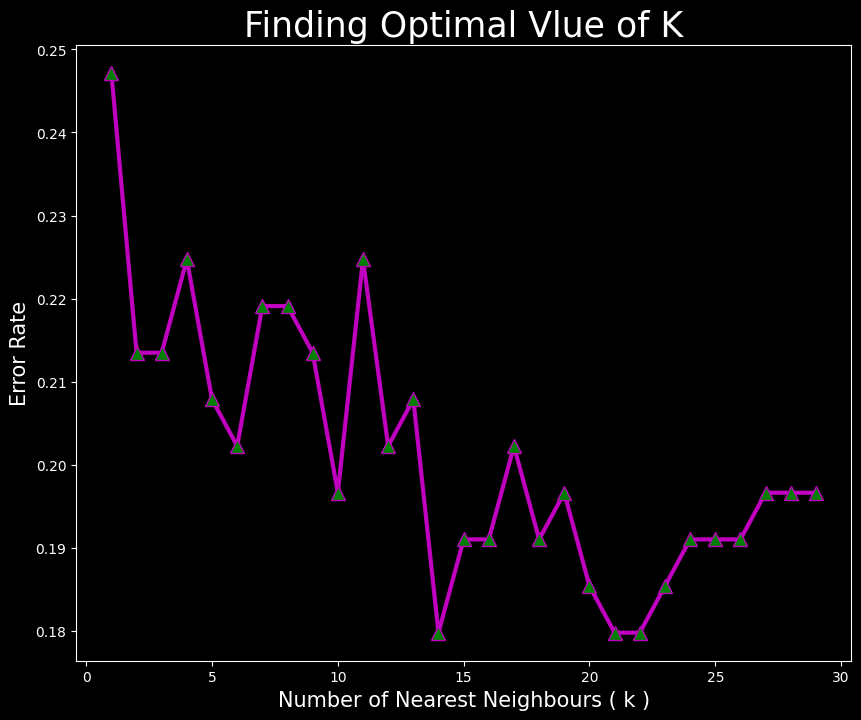

In [68]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 30), Error_Rate, 'm', lw = 3,  marker ='^', markerfacecolor ='g', markersize = 10)
plt.title('Finding Optimal Vlue of K', fontsize = 25)
plt.xlabel('Number of Nearest Neighbours ( k )', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

### KNN with optimal K

In [69]:
knn_24 = KNeighborsClassifier(n_neighbors = 14)

In [70]:
knn_24.fit(X_train_scaled, y_train)
y_pred_24 = knn_24.predict(X_test_scaled)

In [71]:
Accuracy = np.mean(y_pred_24 == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 82.02


## Accuracy, Precision, Recall and F1-Score

In [72]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred_24, normalize=True)]
,"Precision":[precision_score(y_test, y_pred_24, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred_24, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred_24, average = 'macro')]})

In [73]:
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.820225,0.812662,0.805345,0.808525


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_24))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       109
           1       0.78      0.74      0.76        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178



## Logistic Regression

In [75]:
model = LogisticRegression()
LR = model.fit(X_train_scaled, y_train)

In [76]:
y_pred_LR = LR.predict(X_test_scaled)

### Metrics

In [77]:
Accuracy = np.mean(y_pred_LR == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 77.53


In [78]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       109
           1       0.68      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



## Naive Baye's

In [79]:
NB = GaussianNB()
NB.fit(X_train_scaled, y_train)

GaussianNB()

In [80]:
y_pred_NB = NB.predict(X_test_scaled)

### Metrics

In [81]:
Accuracy = np.mean(y_pred_NB == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 77.53


In [82]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       109
           1       0.69      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



## PCA to create uncorrelated features

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
X_pca_train = pca.fit_transform(X_train_scaled)
X_pca_test = pca.transform(X_test_scaled)

### Check the correlation between the features

In [84]:
cor = np.corrcoef(X_pca_train[:,0], X_pca_train[:,1]).round(2)
cor

array([[1., 0.],
       [0., 1.]])

## Logistic Regression on uncorrelated data

In [85]:
LRPCA = LogisticRegression()
LRPCA.fit(X_pca_train, y_train)

LogisticRegression()

In [86]:
y_pred_pca = LRPCA.predict(X_pca_test)

### Metrics

In [87]:
Accuracy = np.mean(y_pred_pca == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 79.21


## Naive Baye's on uncorrelated data

In [88]:
NB_model_PCA = GaussianNB()
NB_model_PCA.fit(X_pca_train, y_train)

GaussianNB()

In [89]:
y_pred_NBPCA = NB_model_PCA.predict(X_pca_test)

### Metrics

In [90]:
Accuracy = np.mean(y_pred_NBPCA == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 79.21


## Summary

**KNN** Algorithm has the best accuracy on current dataset.